<a href="https://colab.research.google.com/github/irfanc/TelcomProject/blob/master/Irfan_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO :: 
EDA
Modularization
Hyperparamerization on selected model

In [ ]:
########################################### IMPORT ALL THE REQUIRED LIBRARIES ###########################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from xgboost import plot_importance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPClassifier
from IPython.display import Audio
import scipy 
sound_file ="Neene Modalu.mp3"
import time

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/gdrive')
# # %cd /gdrive
# print( os.getcwd())

In [ ]:
col = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_hot_login", "is_guest_login","_count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
df = pd.read_csv("Train.txt",names = col)
df_test = pd.read_csv("Test.txt",names = col)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## *Check for Missing Values*

In [ ]:
def plt_missing_value_percentage(DF , title):
    plt.figure ( figsize = (15,5))
    print(DF.isnull().sum()*100/len(DF))
    ax = sns.heatmap(data = DF.isna() ,cbar= False, cmap = 'BuPu_r', yticklabels = False)
    ax.set_title(title)
    plt.show()



duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_hot_login                   0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

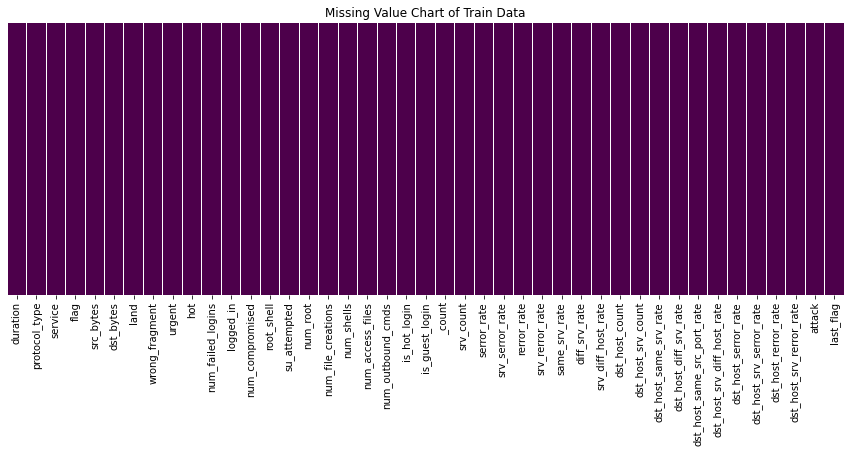

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_hot_login                   0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

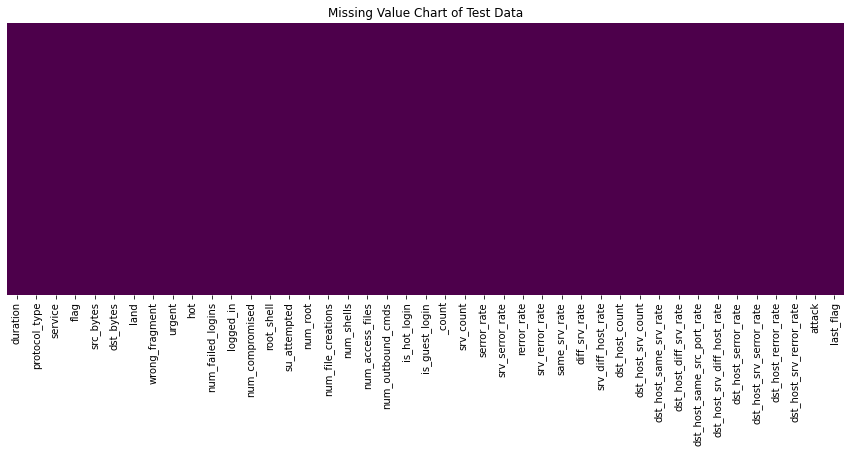

In [ ]:
plt_missing_value_percentage(df, "Missing Value Chart of Train Data")

plt_missing_value_percentage(df_test,"Missing Value Chart of Test Data")


## EDA

In [ ]:
df_eda = df.copy()

In [ ]:
def compute_attack_type(x):
    if (x['attack'] == 'normal'):
        return 'no attack'
    return 'attack'

df_eda['attack_type'] = df_eda.apply(lambda x: compute_attack_type(x),axis=1)
df_eda['attack_type'].value_counts()

no attack    67343
attack       58630
Name: attack_type, dtype: int64


### *Attack Class Density*

In [ ]:
def check_attack_class_density(df):
    fig, ax = plt.subplots(2,1,figsize = (20,20))
    fig.suptitle('Target Class distribution', fontsize=50) # Add the text/suptitle to figure

    attack_df = df["attack"].value_counts()[1:]
    l = []
    for x in attack_df :
        if ( x < 10) :
          l.append(0.5)
        elif ( x < 10) :
          l.append(0.4)
        elif ( x < 50) :
          l.append(0.3)
        elif ( x < 1000) :
          l.append(0.1)
        else:
          l.append(0)
    
    explode =  tuple(l)

  # frrequency graph of 'attack'
    sns.countplot('attack', data = df, order= attack_df.index, ax = ax[0])
    ax[0].set_ylabel('# of Attacks', fontsize=18)
    ax[0].set_xlabel('Type of Attacks', fontsize=18)
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90, fontsize=18)
    ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=16)

    autoLabel( ax[0])


    # pie chart of 'attack'
    attack_df.plot.pie(ax = ax[1], autopct='%1.2f%%', explode = explode, shadow = True, startangle = 45, textprops={'fontsize': 18})
    ax[1].set_aspect(aspect = 'auto')
    plt.tight_layout()
    plt.show()

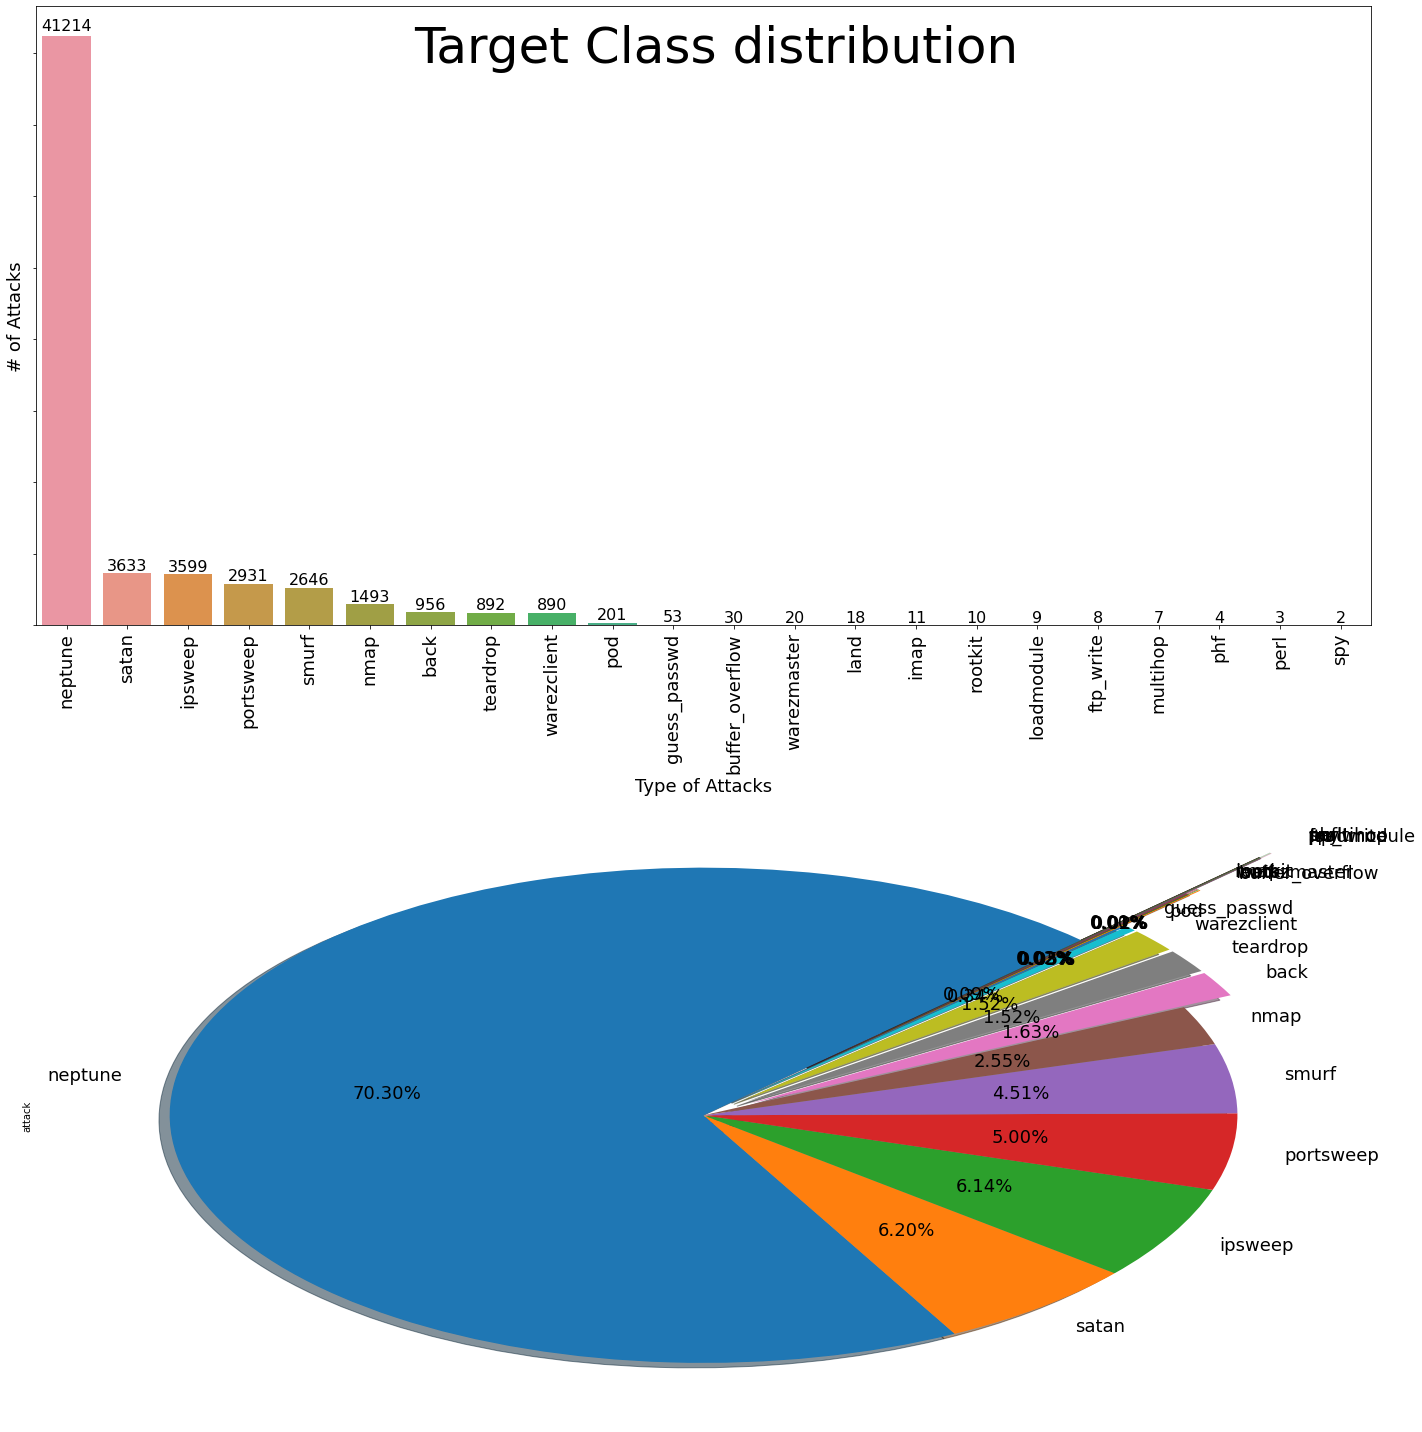

In [ ]:
# Check Attack Class Density in Train data
check_attack_class_density(df)

In [ ]:
##### Neptune is most common type of attack - 70%
##### Spy is least common type of attack - 0.02%

In [ ]:
def autoLabel(ax, fontsize=16):
    for rect in ax.patches:
        height = 0
        width  = 0 
        if (rect.get_height()):
            height = rect.get_height()
            width = rect.get_width()
        ax.text(rect.get_x() + width/2., 1.005*height, str(height), ha='center', va='bottom', fontsize = fontsize)


#### Analysis of protocol_type Vs Attack/No Attack Scenario


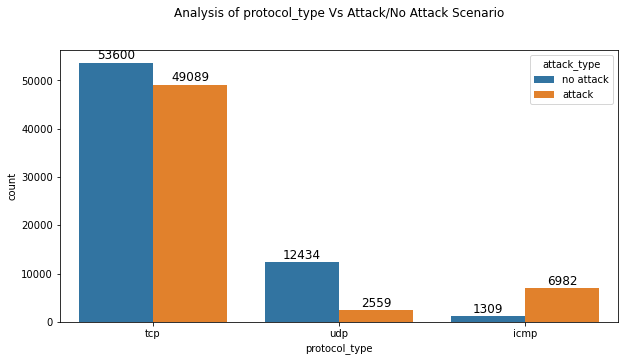

In [ ]:
fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of protocol_type Vs Attack/No Attack Scenario\n\n', loc = 'center', pad =1.0)

sns.countplot(x = 'protocol_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)
plt.show()

##### TCP is most commly used protocl type used in network communication, 
##### ICMP packets were higher in case of attack scenario as compared to no attack scenario

#### Analysis of Wrong fragment counts in case of Attack and No Attack scenario

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


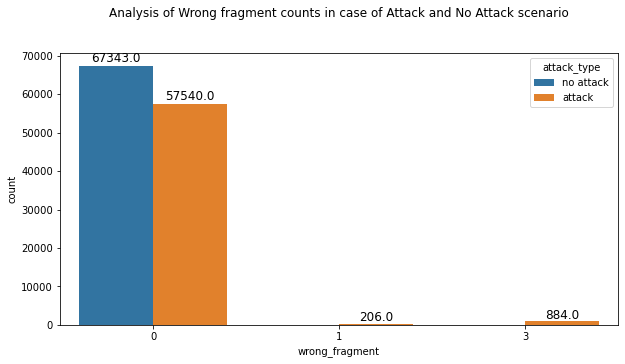

In [ ]:
#### Analysis of Netwrok Error in case of Attack and No Attack scenario

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of Wrong fragment counts in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'wrong_fragment', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)
plt.show()

##### Wrong fragments are seen only when there is a attack scenario

#### Analysis of Netwrok Error in case of Attack and No Attack scenario


posx and posy should be finite values
posx and posy should be finite values


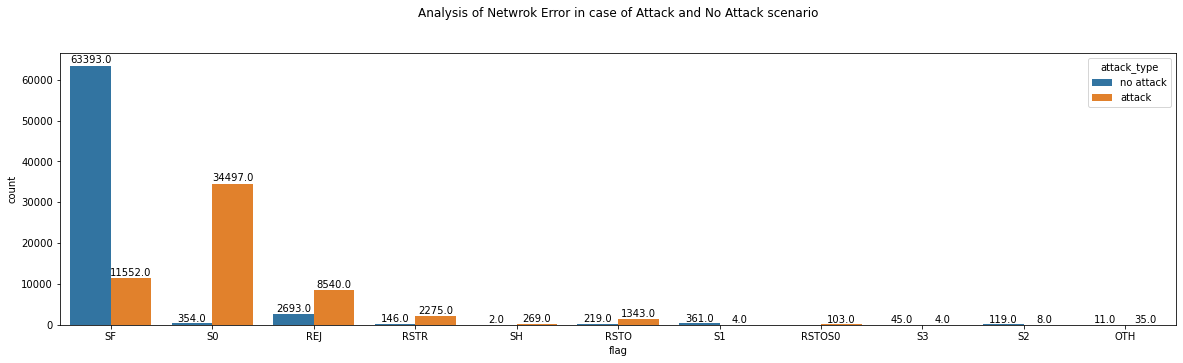

In [ ]:

fig , ax =  plt.subplots( 1,1 , figsize = (20,5))
plt.title('Analysis of Netwrok Error in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'flag', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=10)
plt.show()

##### SF was most common error in no-attack scenario
##### S0 was most common error in attack scenario

#### Analysis of HOT Login in case of Attack and No Attack scenario


posx and posy should be finite values
posx and posy should be finite values


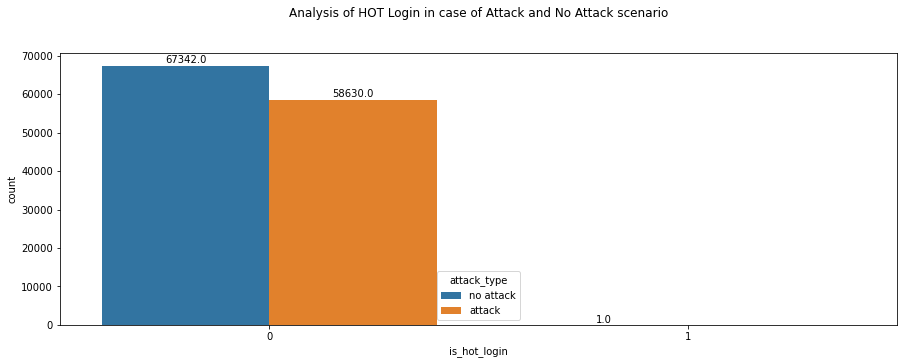

In [ ]:
fig , ax =  plt.subplots( 1,1 , figsize = (15,5))
plt.title('Analysis of HOT Login in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'is_hot_login', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=10)
plt.show()

##### There was no hot login (i.e root or admin login) during the attack scenarios

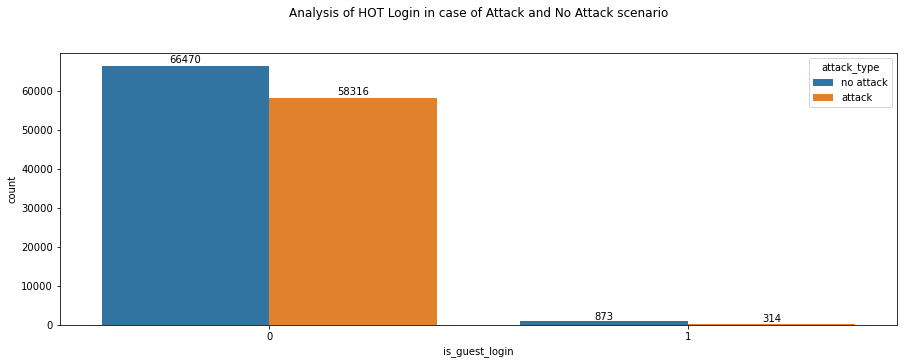

In [ ]:
fig , ax =  plt.subplots( 1,1 , figsize = (15,5))
plt.title('Analysis of Guest Login in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'is_guest_login', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=10)
plt.show()

##### There was no hot login (i.e root or admin login) during the attack scenarios

#### Analysis of Duration of Network connection in case of Attack and No Attack scenario


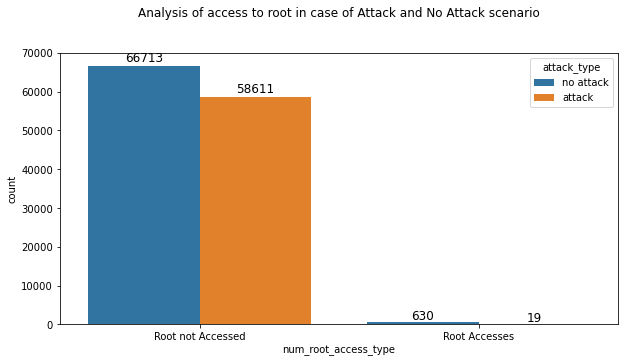

In [ ]:
def compute_duration_type(x):
    if x['num_root']!=0:
        return 'Root Accesses'
    return 'Root not Accessed'

df_eda['num_root_access_type'] = df_eda.apply( lambda x: compute_duration_type(x), axis =1 )
df_eda['num_root_access_type'].value_counts()

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of access to root in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'num_root_access_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)

plt.show()

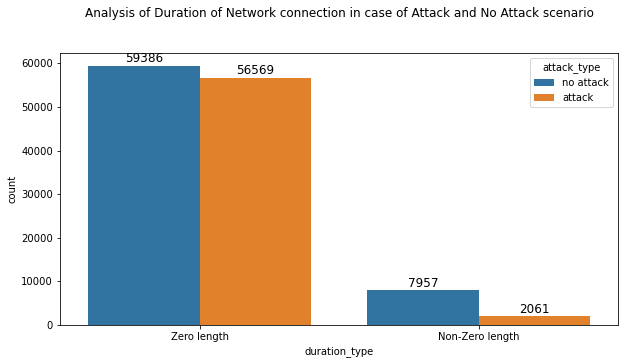

In [ ]:
def compute_duration_type(x):
    if x['duration']!=0:
        return 'Non-Zero length'
    return 'Zero length'

df_eda['duration_type'] = df_eda.apply( lambda x: compute_duration_type(x), axis =1 )
df_eda['duration_type'].value_counts()

fig , ax =  plt.subplots( 1,1 , figsize = (10,5))
plt.title('Analysis of Duration of Network connection in case of Attack and No Attack scenario\n\n')
sns.countplot(x = 'duration_type', data = df_eda , hue = 'attack_type')
autoLabel( ax, fontsize=12)

plt.show()

## *Drop unwanted columns*

In [ ]:
def drop_cols_with_equal_min_max(DF) :
  df_t = DF.describe().T
  drop_cols = df_t[df_t['min'] == df_t['max']].index.to_list()
  print('No. of colums with all value to be same - {} , {} '.format( len(drop_cols), str(drop_cols) )   )
  if (len(drop_cols) is not 0) :
    DF.drop(columns = drop_cols, inplace = True ) 


In [ ]:
drop_cols_with_equal_min_max(df)
drop_cols_with_equal_min_max(df_test)


No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 
No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 


In [ ]:
target_cols = 'attack'
feature_cols = df.drop(columns = target_cols).columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Check and Remove correlation b/w Columns

### Checking the co-relation between the Xs

In [ ]:
# Checking the co-relation between the Xs
def plot_correlated_cols(DF) :
  fig, ax = plt.subplots (1,1, figsize = (30,30) )
  fig.suptitle('Correlation Matrix', fontsize=50) # Add the text/suptitle to figure
  sns.heatmap( DF, annot=True ,  cmap = 'YlGnBu',  fmt='.2g', square= True )
  plt.show()

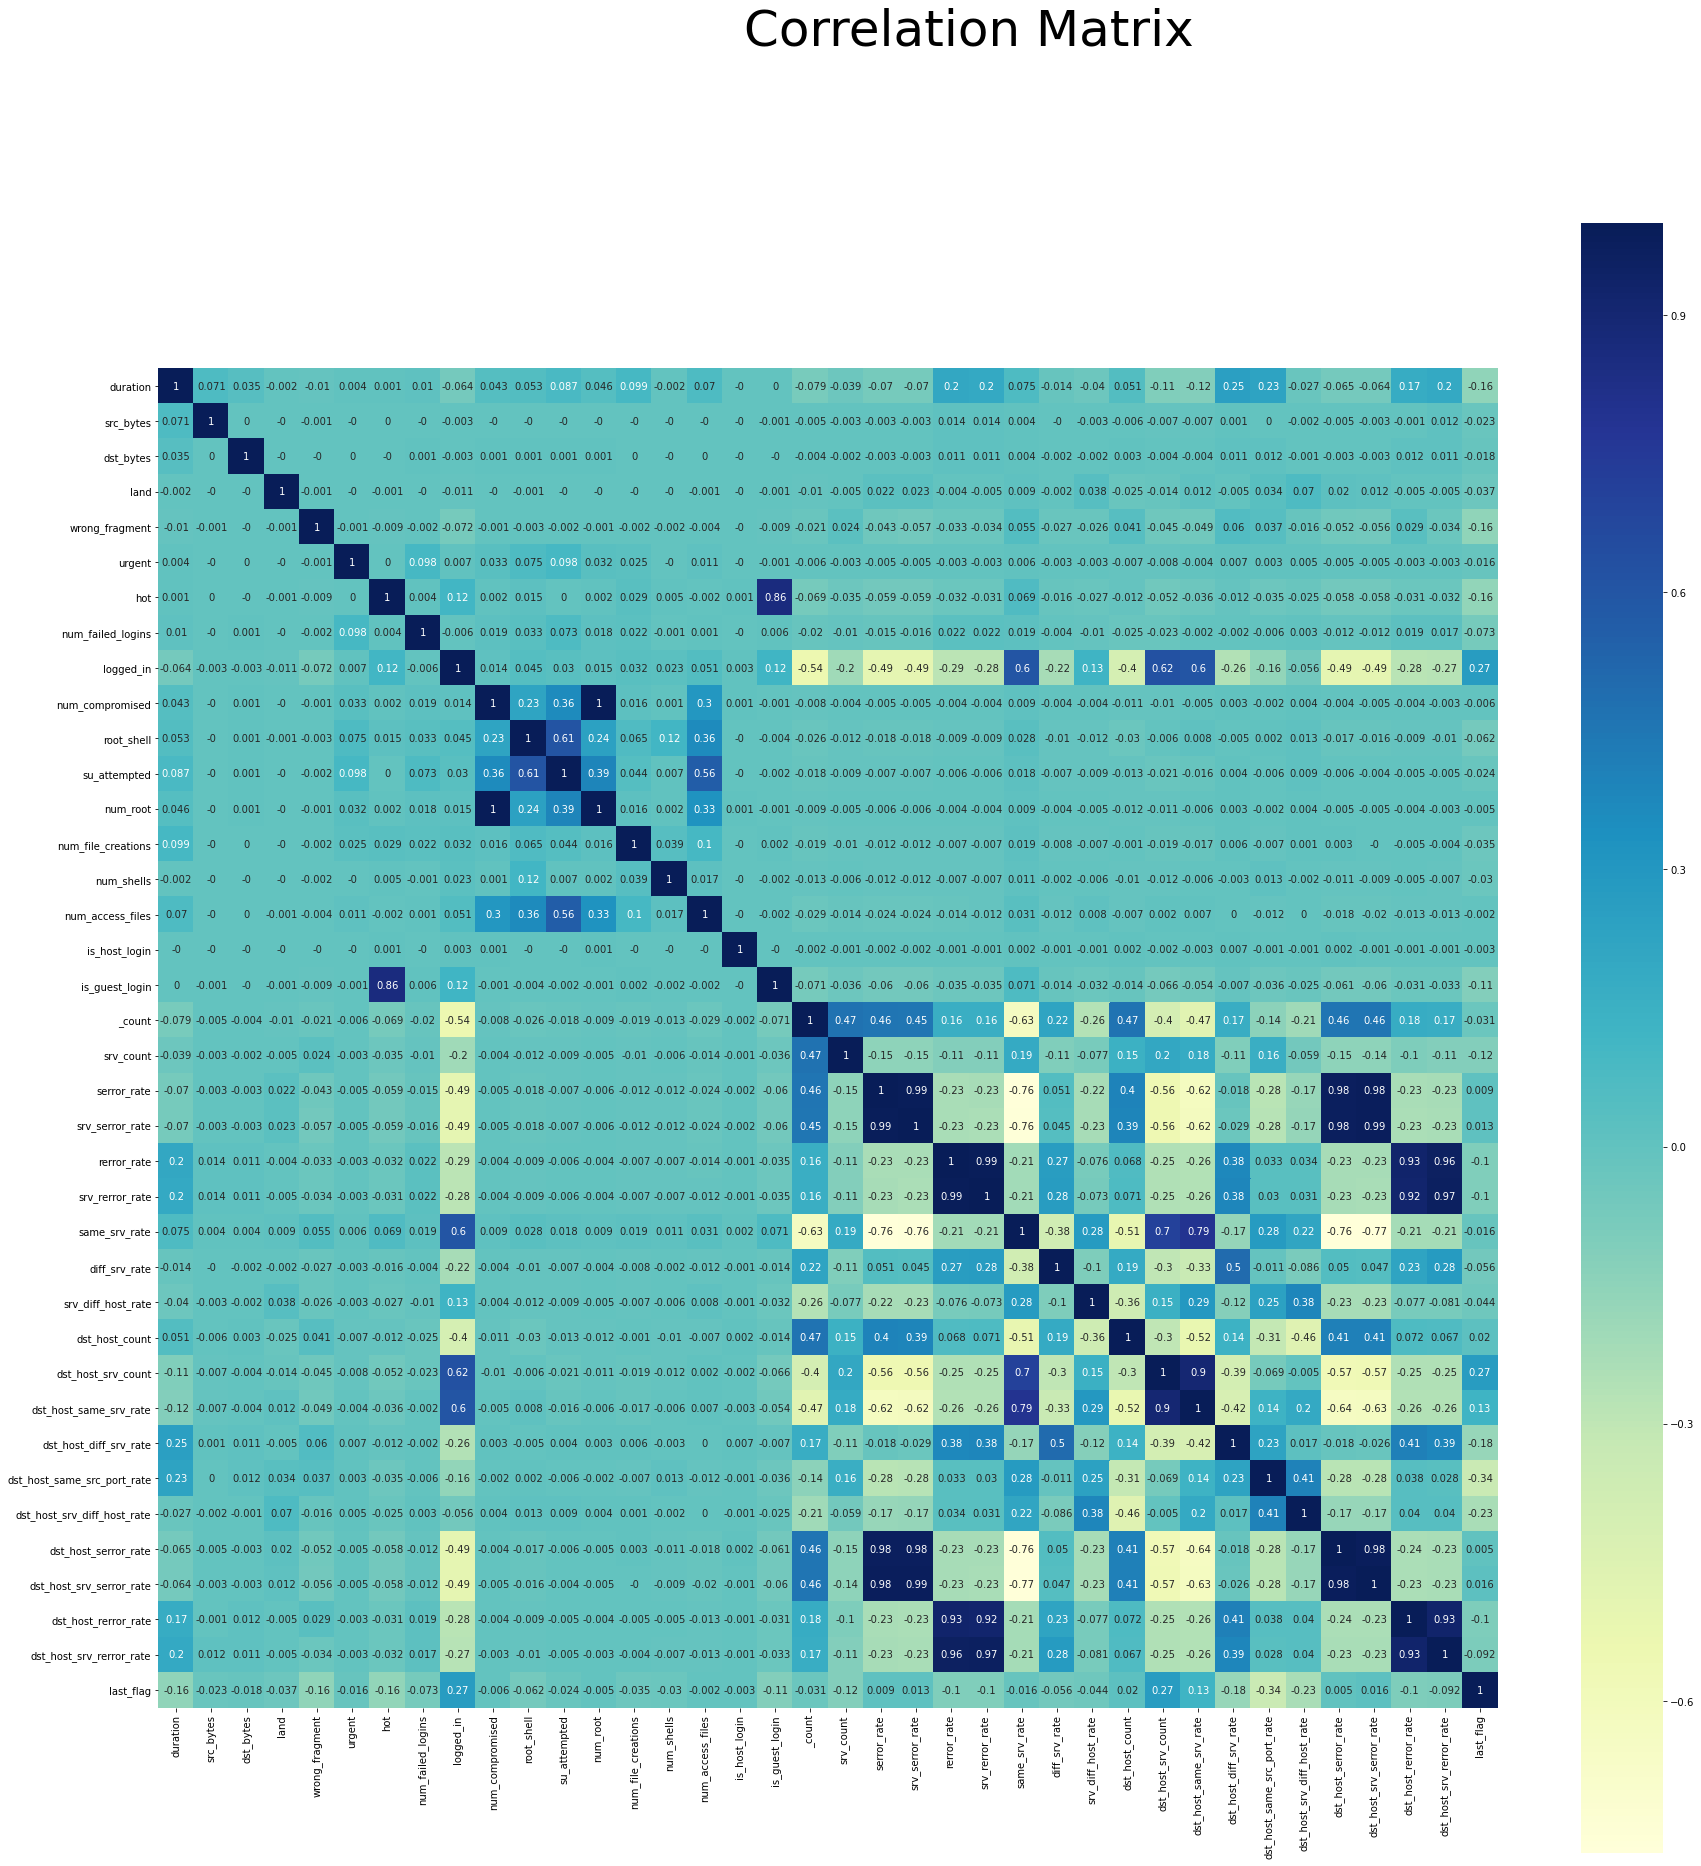

In [ ]:
plot_correlated_cols(round( df.corr() , 3 ))


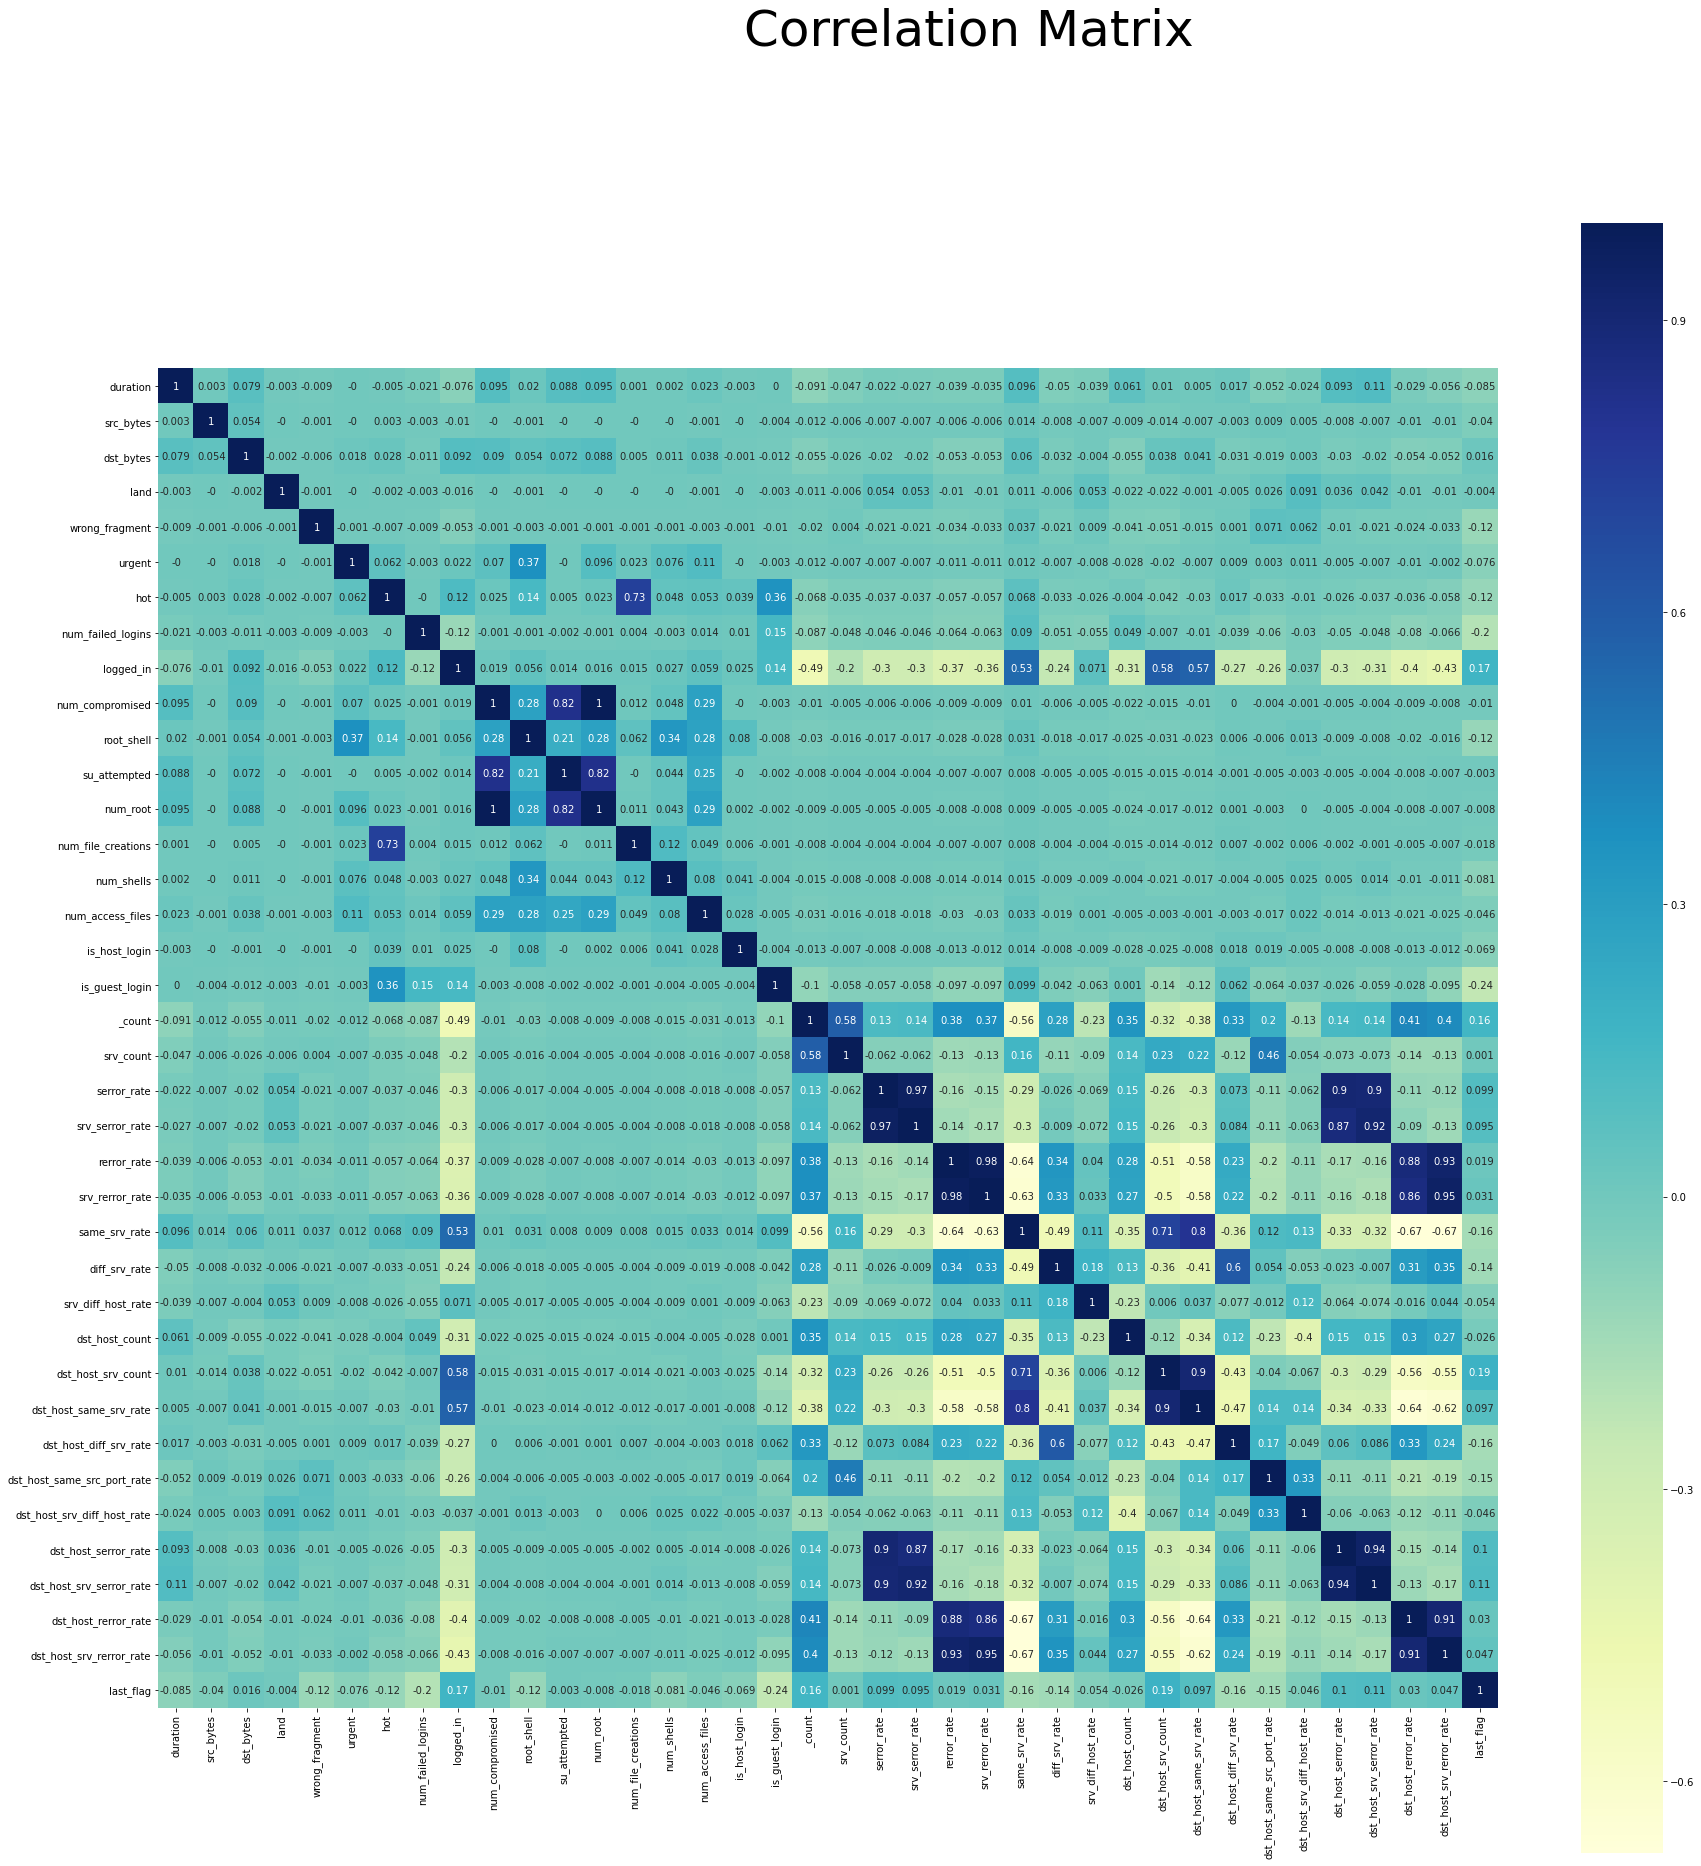

In [ ]:
plot_correlated_cols(round( df_test.corr() , 3 ))


#### Visualize co-related feature with relation > 0.7


In [ ]:
# returns correlated Matrix, with 1 representing corelation and 0- indicated no corelation, 
# criteria of corelation is threshold_value of corelation, is corelation value > threshold_value then cols are said to be corelated 
def corelated_feature_matrix(DF, threshold_value=0.7) :
  corr = round( DF.corr() , 3 )
  corr1 = np.where(( abs(corr)  > threshold_value), 1, 0)
  df_corr =  pd.DataFrame( corr1, columns = corr.columns, index = corr.columns)
  return df_corr


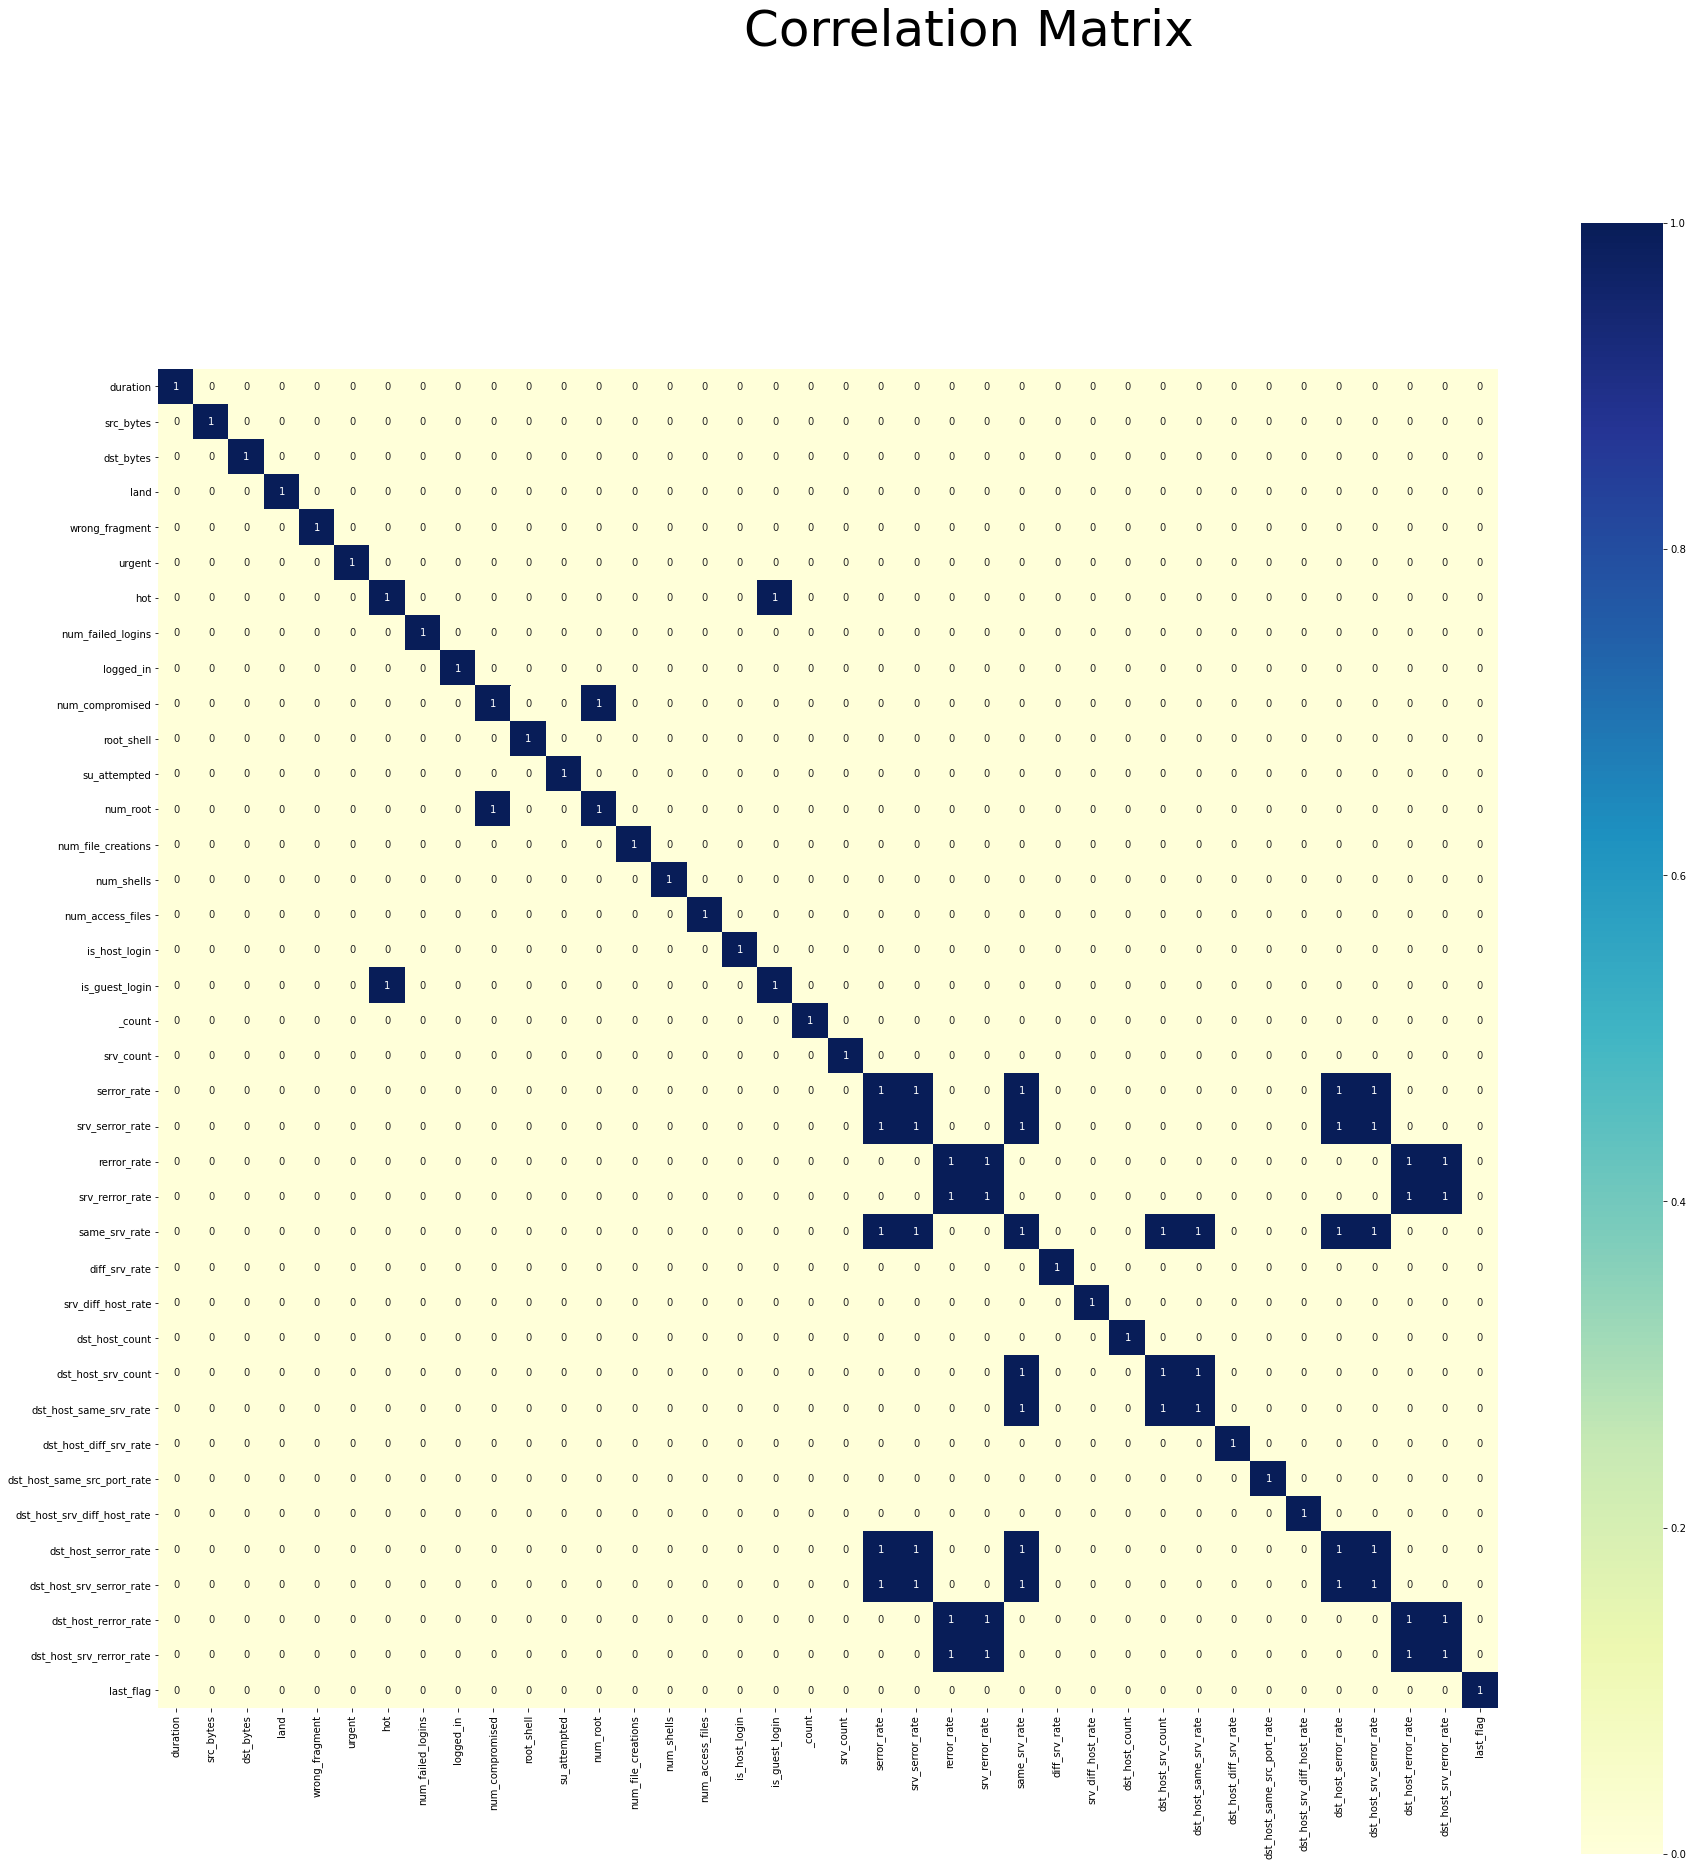

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

#### Compute list of co-related columns to be dropped

In [ ]:
# returns list of corelated columns which we can drop
# input is correlated matrix
def compute_corelated_cols(DF):
  dict = {}
  # iterate over all the columns to find out others which are correlated > 0.7,  as per corrlation matrix
  for c in DF.columns:
      l = DF.index[df_corr[c] == 1].tolist()
      l.remove(c)  #  remove slef column from the list
  #     print(l)
      if len(l) :
          dict[c] = set(l)

  drop_set = set()
  for e in dict:
  #     print(e , dict[e] , drop_set)
      if e not in drop_set :  
          drop_set = drop_set.union(dict[e])

  print("No. of corelated columns needs to be dropped  are  {}\n{}".format(len(drop_set), str(drop_set)))
  return drop_set

#### dropping of columns

In [ ]:
# computing list of columns which needs to be dropped
drop_cols = compute_corelated_cols(df_corr)

# Drop columns from Train and Test DataSet
df.drop( columns= drop_cols , inplace = True)
df_test.drop( columns= drop_cols , inplace = True)

No. of corelated columns needs to be dropped  are  10
{'srv_rerror_rate', 'same_srv_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'is_guest_login', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate'}


#### plot corelated columns after dropping

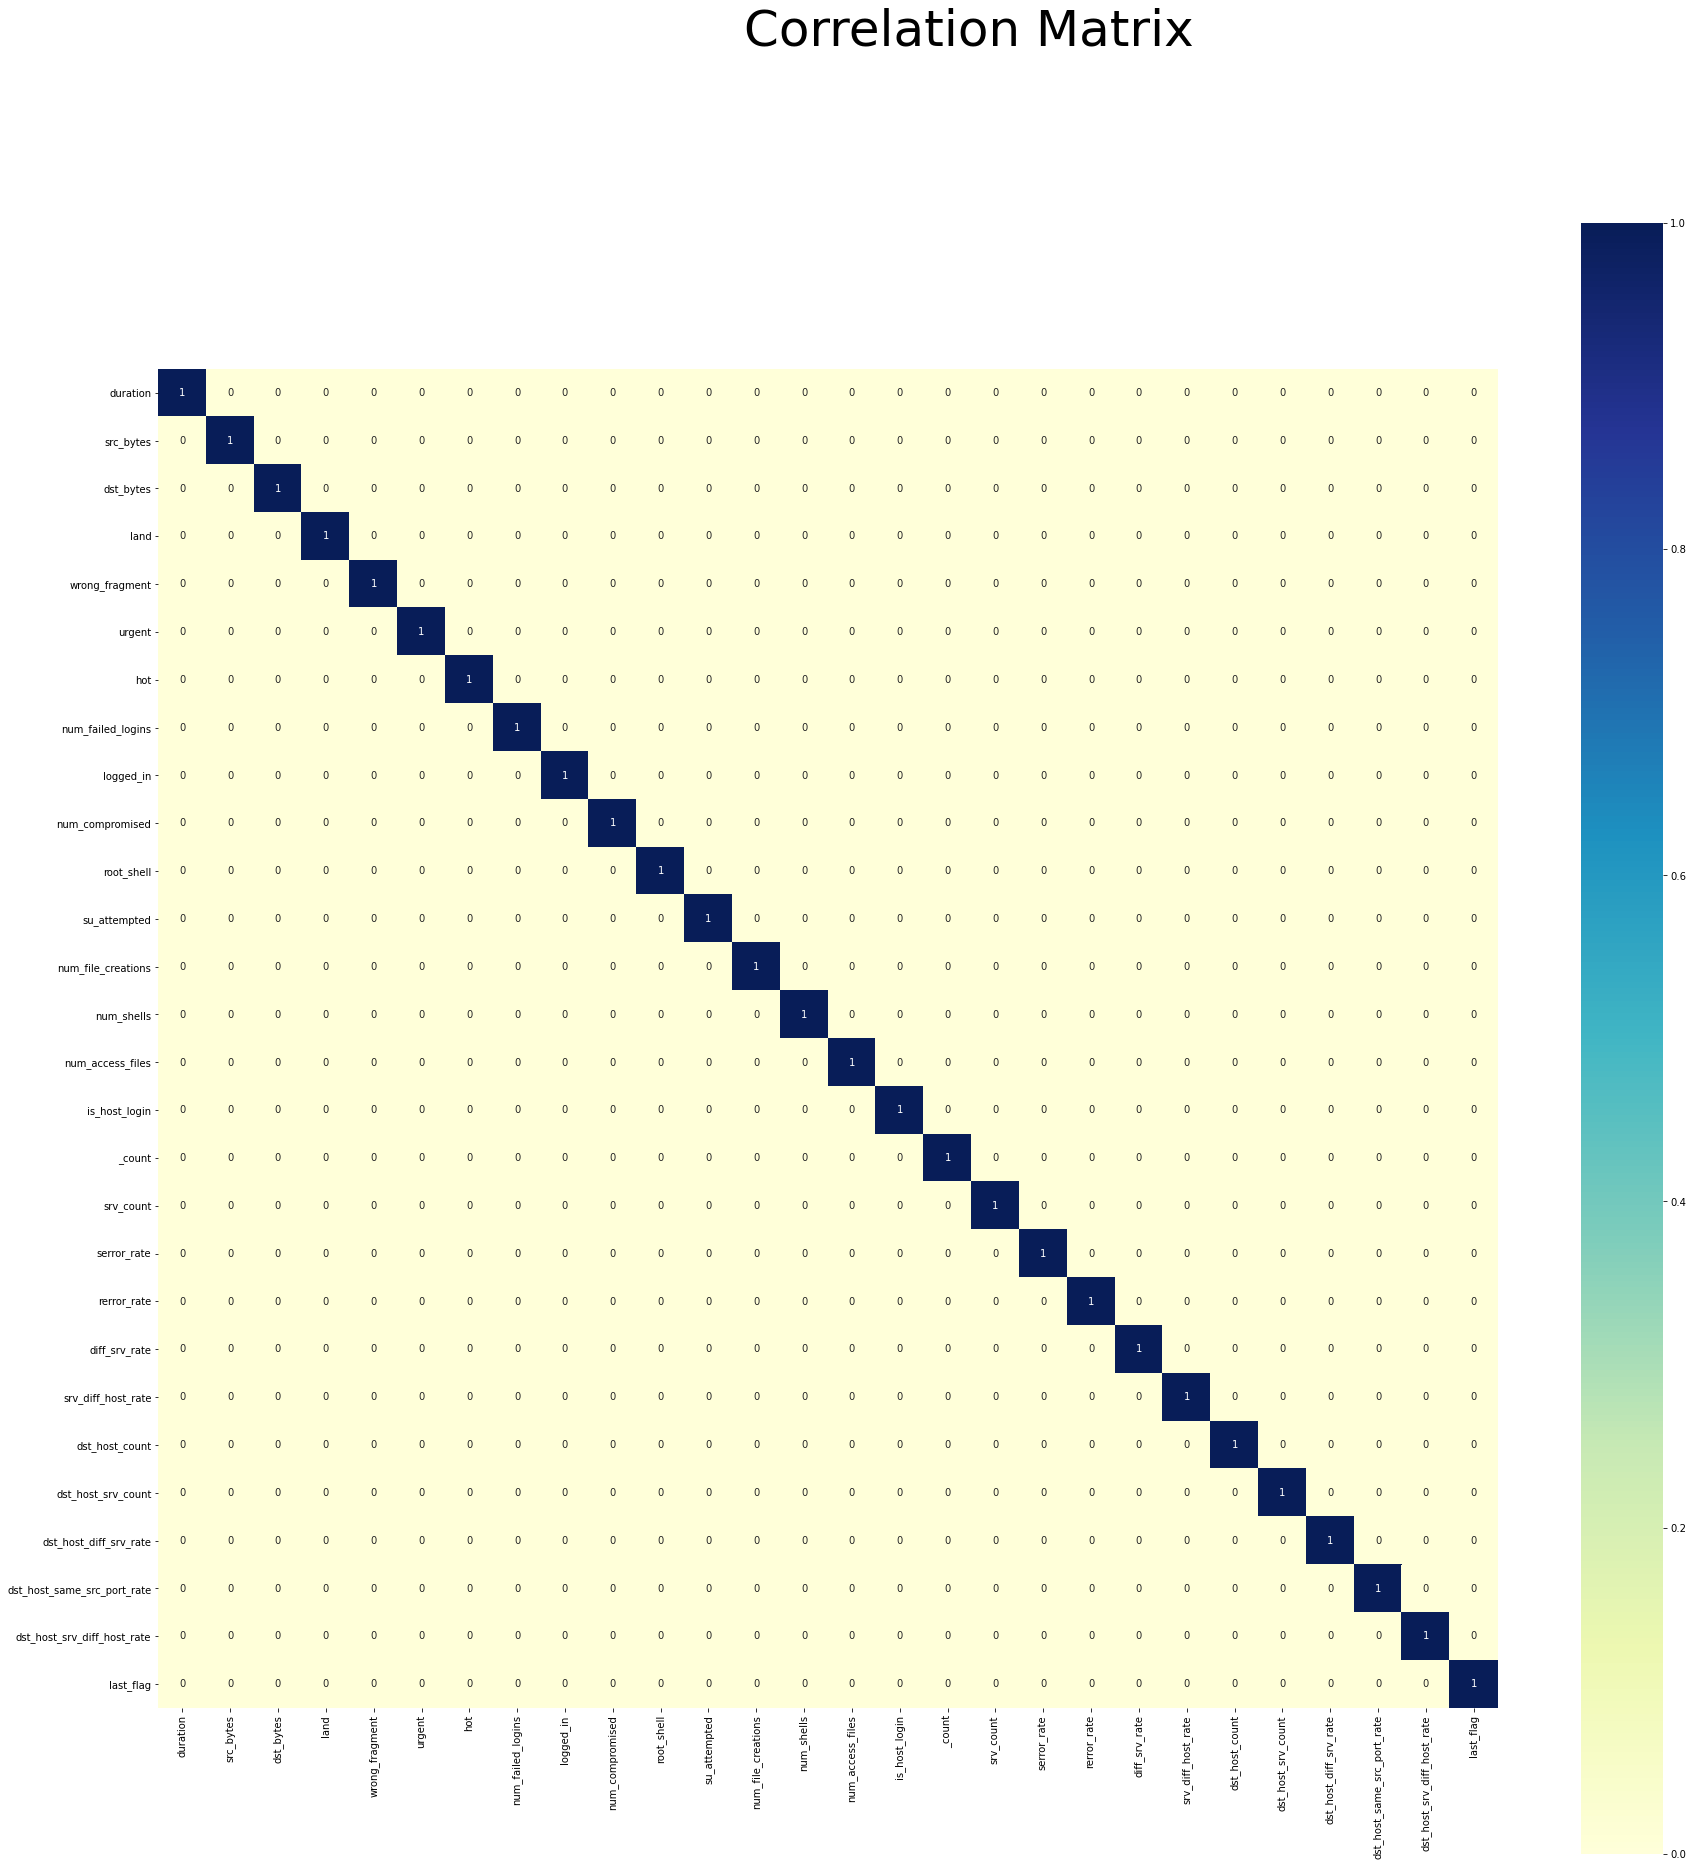

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

## *Encode the Data*
######  refer :: https://pbpython.com/categorical-encoding.html

In [ ]:
df_train = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### encoding binary columns

In [ ]:
# encoding binary columns
def encoding_binary_cols(DF, binary_cols):
    DF[binary_cols] = DF[binary_cols].astype('int8')

binary_cols = ['land', 'logged_in', 'root_shell', 'is_host_login', 'su_attempted']
encoding_binary_cols(df, binary_cols)
encoding_binary_cols(df_test, binary_cols)

# df_train[binary_cols].info()

### encoding categorical columns

In [ ]:
# encoding categorical columns
def encoding_categorical_cols(DF , categorical_cols):
    from sklearn.preprocessing import LabelEncoder

    lb_make = LabelEncoder()

    for c in categorical_cols :
        DF[c] = lb_make.fit_transform(DF[c])

categorical_cols = ['protocol_type', 'service', 'flag']
encoding_categorical_cols(df, categorical_cols)
encoding_categorical_cols(df_test, categorical_cols)

### encoding 'attack' columns

In [ ]:

#  encode 'normal' attack as 0 , i.e Fasle  and othere attacks as True attack
def encoding_target_cols(DF , target_cols):
    DF[target_cols+'_code'] = np.where(DF[target_cols].str.contains("normal"), False, True)
    DF[target_cols]      = DF[target_cols].astype('category')
    DF[target_cols+'_type'] = DF[target_cols].cat.codes

target_cols = 'attack'
encoding_target_cols(df_train , target_cols)
encoding_target_cols(df_test , target_cols)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22544 non-null  int64   
 1   protocol_type                22544 non-null  int64   
 2   service                      22544 non-null  int64   
 3   flag                         22544 non-null  int64   
 4   src_bytes                    22544 non-null  int64   
 5   dst_bytes                    22544 non-null  int64   
 6   land                         22544 non-null  int8    
 7   wrong_fragment               22544 non-null  int64   
 8   urgent                       22544 non-null  int64   
 9   hot                          22544 non-null  int64   
 10  num_failed_logins            22544 non-null  int64   
 11  logged_in                    22544 non-null  int8    
 12  num_compromised              22544 non-null  int64   
 13  r

## *Dimensionality reduction*

### Feature Selection - by Random Forest

In [ ]:
target_cols = ['attack', 'attack_code'  , 'attack_type']
feature_cols = df.drop(columns = target_cols).columns
len(df_train.columns)

34

In [ ]:

def plot_important_cols(DF, col , imp, min_importance_value = 0.02):
    fig = plt.figure(figsize = (20,10))
    fig.suptitle(' Feature Importance Chart', fontsize=50) # Add the text/suptitle to figure

    ax = sns.barplot(col , imp )
    ax.set_xlabel(" Columns ", fontsize=18)
    ax.set_ylabel(" Columns relative importance", fontsize=20)
    ax.set_xticklabels(col, rotation=90, fontsize=20)

    ax.grid(b=True, which='both', color='b', linestyle='-')
    ax.grid(b=True, which='minor', color='r', linestyle=':')
    ax.minorticks_on()
    ax.set_axisbelow(True)

    ax.axhline(min_importance_value, color = 'red')
    ax.text(-3, min_importance_value + 0.01, "Minimum threshold importance value\n for feature selection ",color = 'red', fontsize=20)
    plt.show()

# feature selection by Random Forest
def compute_important_cols(DF, min_importance_value = 0.02, plot = False):
    X =  DF[feature_cols]
    Y =  DF['attack_code']
    model = RandomForestClassifier(random_state=123, max_depth=20)
    model.fit(X,Y)
    imp = model.feature_importances_ 

    imp_features = []
    for i, f in zip(imp, feature_cols):
        if i > min_importance_value :
            imp_features.append(f)
    print ("Out of {} features based on relative importance = {} selecting {} features".format (len(feature_cols), min_importance_value,  len (imp_features)))
    if( plot ):
        plot_important_cols(DF, X.columns , imp)
    return imp_features




imp_cols = compute_important_cols(df_train, min_importance_value = 0.02, plot=False)

Out of 31 features based on relative importance = 0.02 selecting 13 features


## Pair plots for all features

['diff_srv_rate', 'dst_host_srv_count', '_count', 'dst_host_diff_srv_rate', 'last_flag', 'src_bytes', 'dst_host_same_src_port_rate', 'dst_bytes', 'serror_rate']


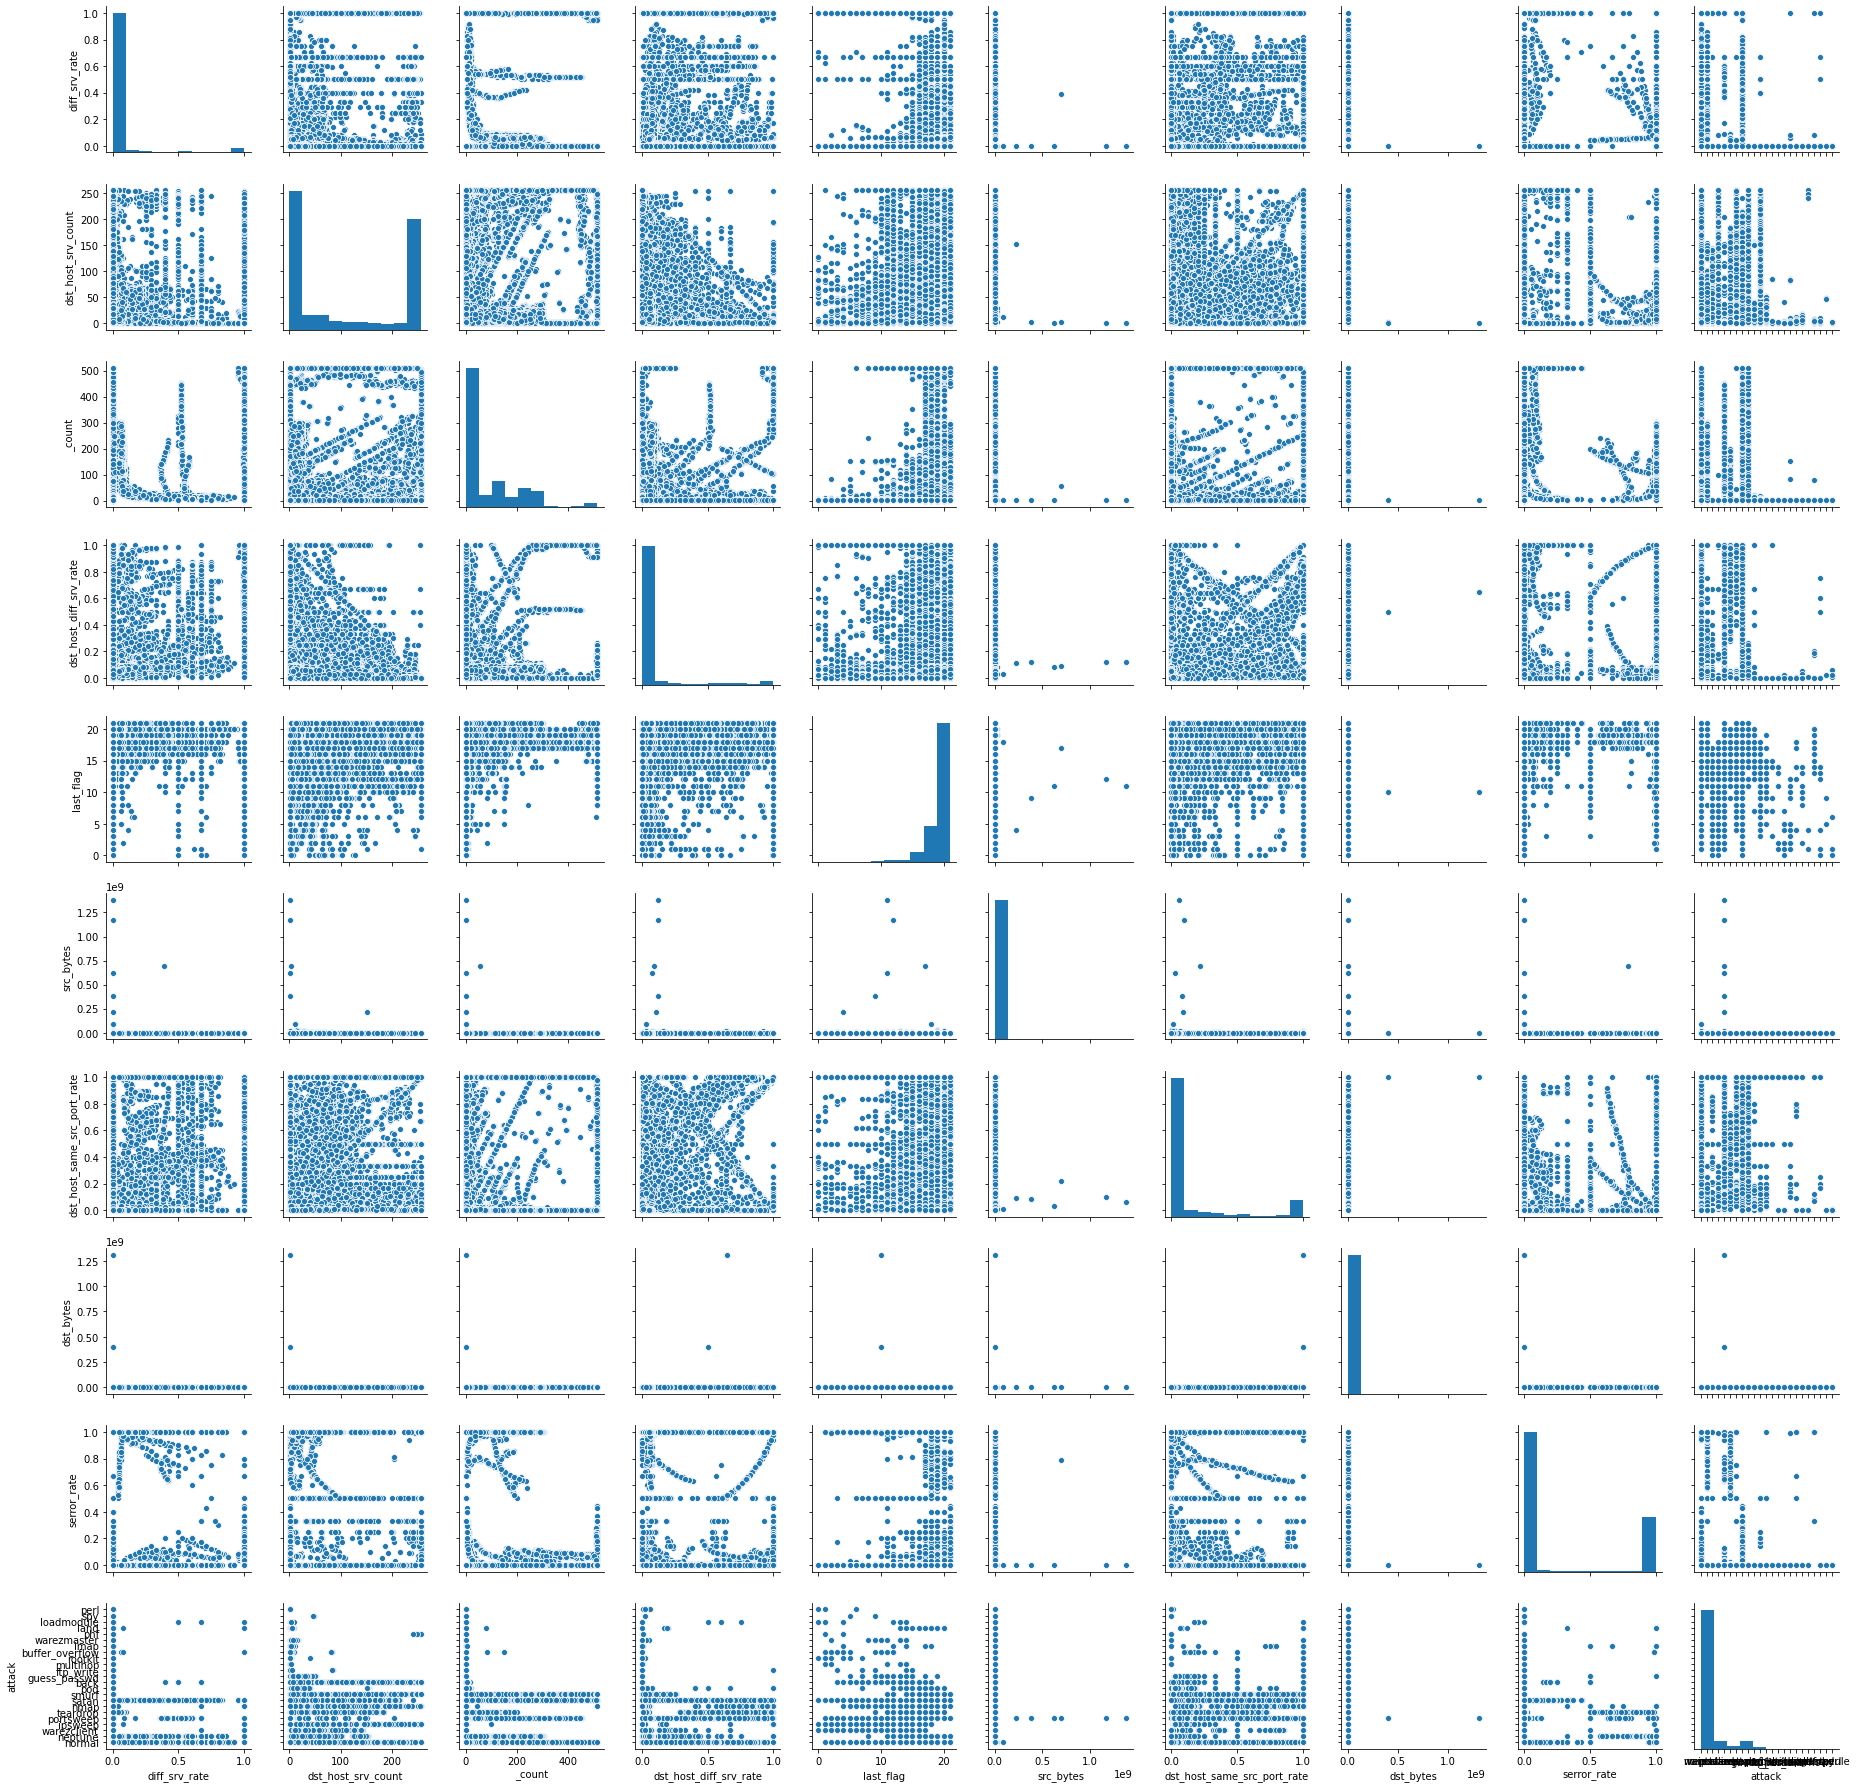

In [ ]:
# numerical columns
cols =  list ( set(imp_cols) -  set(binary_cols) -  set(categorical_cols))
print(cols)
g = sns.pairplot(df, vars = cols + ['attack'])

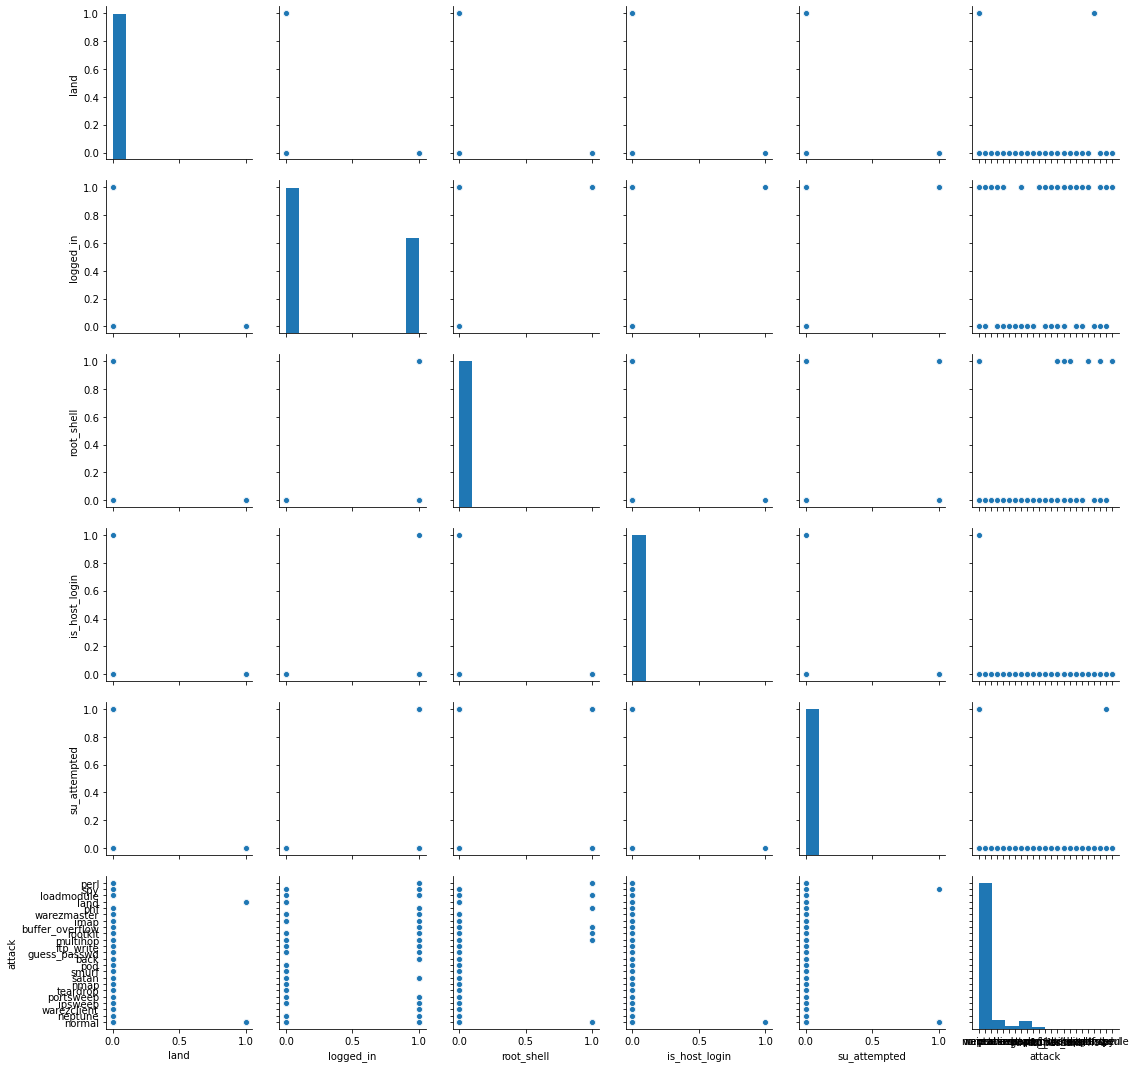

In [ ]:
# binary columns
g = sns.pairplot(df, vars =  binary_cols + ['attack'])

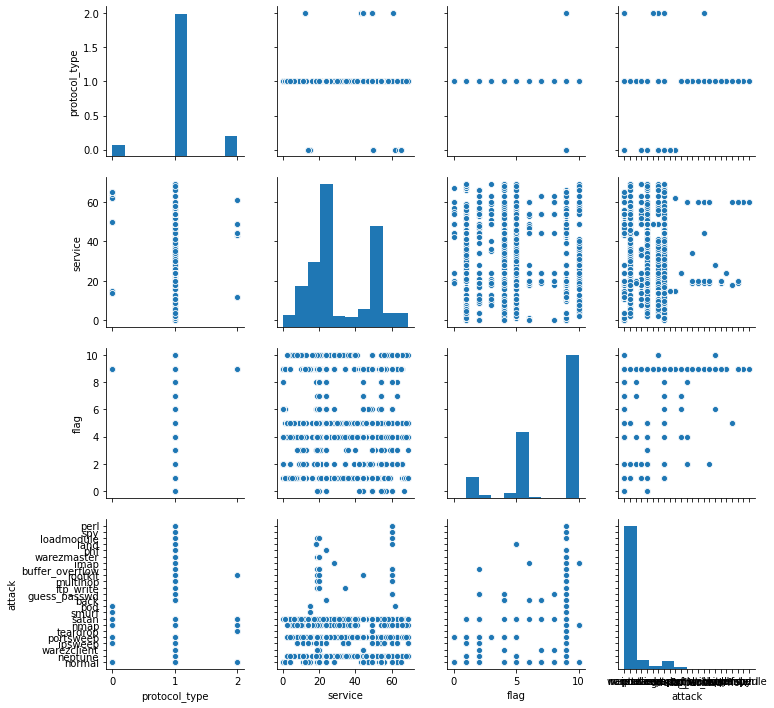

In [ ]:
# categorical columns
g = sns.pairplot(df, vars =  categorical_cols + ['attack'])

In [ ]:
imp_cols

In [ ]:
df[imp_cols].info()

### Normalize the test and train data

In [ ]:
from sklearn import preprocessing

def scaleData(DF):
    scl  = preprocessing.MinMaxScaler(feature_range=(0,1))
    arr_scld = scl.fit_transform(DF)
    d_scld = pd.DataFrame(arr_scld)
    d_scld.columns = DF.columns
#     print(d_scld.describe())
    return d_scld

In [ ]:
# feature_cols = df_train.drop(columns = ['attack', 'attack_code', 'attack_type']).columns
df_train_scaled = scaleData( df_train[feature_cols])
df_test_scaled  = scaleData( df_test[feature_cols])


In [ ]:
df_train_scaled.describe()

In [ ]:
# Function to evaluate each model 
def run_models(spread,X_train, Y_train, X_validation, Y_validation,seed):
    #Select and Add the Models
    models = []
#     models.append(('XGBoo ', XGBClassifier()))
#     models.append(('AdaBoo', AdaBoostClassifier(n_estimators=100, random_state=seed)))
    models.append(('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA   ', LinearDiscriminantAnalysis()))
    models.append(('KNearN', KNeighborsClassifier()))
    models.append(('CART  ', DecisionTreeClassifier()))
    models.append(('NaiveB', GaussianNB()))
#     models.append(('SupVec', SVC(gamma='auto', probability=True)))
    models.append(('RandFo', RandomForestClassifier(n_estimators=100)))
    
    Res_final =[]
    for r in spread: # Select the Category of the Data Seperately
        results = []
        names = []
        F1_Scores =[]
        Auc_Scores =[]
        Train_Scores =[]
        Test_Scores =[]
        Precision_Scores_0=[]
        Precision_Scores_1=[]
        Recall_Scores_1 =[]
        Recall_Scores_0 =[]
        Ex_times =[]
        print("=========================================================")
        print("Scores for "+str(r)+" Variables: ")
        print("=========================================================")
        q = spread[r]
        X_train1 = X_train.iloc[:,q[0]:q[-1]]
        X_validation1 = X_validation.iloc[:,q[0]:q[-1]]
        Y_train1 = Y_train
        Y_validation1 = Y_validation
        for name, model in models: # Run The Models with Selected Data Category
            print("------{} running --------------------------".format(name))
            start_time=time.time()
            m = model
            m.fit(X_train1, Y_train1)
            kfold = KFold(n_splits=10, random_state=seed)
            cv_results = model_selection.cross_val_score(model, X_train1, Y_train1, cv=kfold, scoring="accuracy")
            Trn_scr = np.round((cv_results)*100,2)

            #Trn_scr = np.round((m.score(X_train1, Y_train1)*100),2)
            #msg = "Train Score for :"+"%s: %.2f " % (name,Trn_scr)
            #print(msg)
            Train_Scores.append(Trn_scr)

            predictions = m.predict(X_validation1)
            Tst_scr = np.round((accuracy_score(Y_validation1, predictions)*100),2)
            
            #msg = "Test Score for  :"+"%s: %.2f" % (name, Tst_scr)
            #print(msg)
            Test_Scores.append(Tst_scr)

            conf_mat = confusion_matrix(Y_validation1, predictions)
            #print("Confusion Matrix: \n",conf_mat)
            
            CL_R = classification_report(Y_validation1, predictions)

            #print("F1 Score : ", np.round(F1,2))

            probs = m.predict_proba(X_validation1)
            
            # keep probabilities for the positive outcome only
            probs = probs[:, 1]
            # calculate scores
            auc = roc_auc_score(Y_validation1, probs)
            Auc_Scores.append(np.round(auc,2))
            #print("AUC Score: ",np.round(auc,2))

            tn = conf_mat[0][0]
            fp = conf_mat[0][1]
            fn = conf_mat[1][0]
            tp = conf_mat[1][1]

            precision_0 = np.round((tn/(tn+fn)),2)
            precision_1 = np.round((tp/(fp+tp)),2)                        
            recall_0 = np.round((tn/(tn+fp)),2)
            recall_1 = np.round((tp/(fn+tp)),2)
            
            F1 = 2*((precision_1*recall_1)/(precision_1+recall_1))
            F1_Scores.append(np.round(F1,2))
            
            Precision_Scores_0.append(precision_0) 
            Precision_Scores_1.append(precision_1)
            Recall_Scores_0.append(recall_0)
            Recall_Scores_1.append(recall_1)
            
            end_time=time.time()
            elapsed_time= end_time-start_time
            Ex_times.append(np.round(elapsed_time/60,2))
        # summarize scores for selected Category for all the Models
        #print("####################### ",str(r)," Summary #######################")
        Res_Intmdt = pd.DataFrame()
        Res_Intmdt["Model"] = pd.DataFrame(models).iloc[:,0]
        Res_Intmdt["Var"] = str(r)
        Res_Intmdt["Train"] = np.round(np.mean(Train_Scores),2)
        Res_Intmdt["Test"] = np.round(Test_Scores,2)
        Res_Intmdt["Pre0"] = pd.DataFrame(Precision_Scores_0)
        Res_Intmdt["Pre1"] = pd.DataFrame(Precision_Scores_1)
        Res_Intmdt["Rec0"] = pd.DataFrame(Recall_Scores_0)
        Res_Intmdt["Rec1"] = pd.DataFrame(Recall_Scores_1)
        Res_Intmdt["F1"] = pd.DataFrame(F1_Scores)
        Res_Intmdt["AUC"] = pd.DataFrame(Auc_Scores)
        Res_Intmdt["Speed"] = pd.DataFrame(Ex_times)
        #print(Res_Intmdt)
        #print("####################### End of Summary #######################")
        
        # summarize scores for the Categories for all the Models
        #Res_final=pd.concat([Res_final,Res_Intmdt], axis=0)
        #print("=========================================================")
    #print("")
    #print("################################## Final Summary ##################################")
    #print(Res_final)
    #print("################################## End of Summary ##################################")
    return conf_mat, CL_R, Res_Intmdt

In [ ]:
# spread = {"All" :np.arange(0,42)}
# CM1, CLR1, Without_pre_process_all = run_models(spread,X_train, Y_train, X_test, Y_test,seed=7)


In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, metrics


def train_validate_test(X_train , Y_train, X_test, Y_test, test_also=False):
    
    # list of algorithms to be trained - Validated - Tested
    Algos = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(max_depth=10, min_samples_split = 10),

    #Gaussian Processes
#    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
#     linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
##   neighbors.KNeighborsClassifier(),
    
    #SVM
    # svm.SVC(probability=True),
    # svm.NuSVC(probability=True),
    # svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(max_depth=10, min_samples_split = 10),
#     tree.ExtraTreeClassifier(),
    
#     #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
##    XGBClassifier()    
    ]

    
    # name of the columns of the data frame which captures all the data of all algorithms
    MLA_Name = 'MLA Name'
    MLA_Param = 'MLA Parameters'
    MLA_Train_Accuracy = 'MLA Train Accuracy'
    MLA_Validation_Accuracy = 'MLA Validation Accuracy'
    MLA_Validation_STD = 'MLA Validation Accuracy 3*STD'
    MLA_Test_Accuracy = 'MLA Test Accuracy'
    MLA_Time = 'MLA Time'

    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
    #note: this is an alternative to train_test_split
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 123) # run model 10x with 60/30 split intentionally leaving out 10%

    Feature_Importance = {}
    MLA_predict = {} 
    MLA = []
    #index through all algorithm and save performance to table
    for row_index, alg in enumerate(Algos):

        dict = {}
        #set name and parameters
        algo_name = alg.__class__.__name__
        dict[MLA_Name] = algo_name
        dict[MLA_Param]  = str(alg.get_params())

        print("\nAlgo. {} running 0 ".format(algo_name), end = "")

        #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv  = cv_split,return_train_score=True,scoring='f1')
        print(" 1 ", end = "")

        dict[MLA_Time] = cv_results['fit_time'].mean()
        dict[MLA_Train_Accuracy] = cv_results['train_score'].mean()
        dict[MLA_Validation_Accuracy] = cv_results['test_score'].mean()
        dict[MLA_Test_Accuracy] = 0
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        dict[MLA_Validation_STD] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    #     print(dict)
        MLA.append(dict)

        #save MLA predictions - see section 6 for usage
        alg.fit(X_train, Y_train)
        print(" 2 ", end = "")

        try:
            Feature_Importance[algo_name] = alg.feature_importances_
        except AttributeError:
            pass
        print(" 3.a ", end = "")

#         MLA_predict[algo_name] = alg.predict(X_train)
        print(" Done.")

    MLA_compare = pd.DataFrame(MLA)
    
    if(test_also):
        for row_index, alg in enumerate(Algos):
            MLA_compare.loc[row_index, MLA_Test_Accuracy] = alg.score(X_test, Y_test)
    df_Feature_Importance = pd.DataFrame(Feature_Importance , index = X_train.columns)
    return (MLA_compare, df_Feature_Importance)

In [ ]:
Target = ['attack_code']
X_train = df_train_scaled[feature_cols]
Y_train = df_train[Target].copy().values.ravel()
X_test = df_test_scaled[feature_cols]
Y_test = df_test[Target].copy().values.ravel()

In [ ]:
(MLA_compare, df_Feature_Importance) = train_validate_test(X_train , Y_train , X_test , Y_test, test_also=True)

In [ ]:
MLA_compare

In [ ]:

fig, ax = plt.subplots (1,1, figsize = (30,10) )

for col in df_Feature_Importance.columns :
    sns.lineplot(y= df_Feature_Importance[col], x=df_Feature_Importance.index, ax =ax)

ax.set_title('Feature Importance Chart', fontsize=38)
ax.set_ylabel('Importance Value', fontsize=28)
ax.set_xlabel('Features', fontsize=28)
ax.set_xticklabels(df_Feature_Importance.index, rotation = 90, fontsize=18)
plt.legend(df_Feature_Importance.columns, fontsize = 20)
plt.show();